In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


## Cleaning

### Unnamed

In [5]:
df.drop(columns='Unnamed: 0',axis= 1,inplace=True)

### missing data

In [6]:
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [7]:
df = df.drop(df[df['dropoff_longitude'].isnull()].index[0])

In [8]:
df.isna().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### fare amount 

In [9]:
df['fare_amount'].value_counts()

6.50      9684
4.50      8247
8.50      7521
5.70      5858
5.30      5838
          ... 
140.25       1
190.00       1
45.16        1
28.20        1
89.10        1
Name: fare_amount, Length: 1244, dtype: int64

In [10]:
df.drop(df[df['fare_amount'] < 0 ].index,inplace = True) # not logic

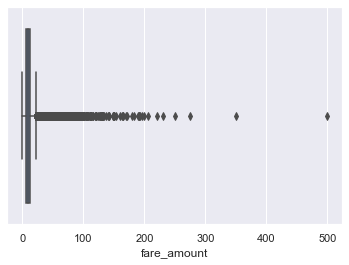

In [11]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.boxplot(data = df , x = 'fare_amount')
#sns.stripplot(data = df , x = 'fare_amount')
plt.show()

### distance (new feature)

In [12]:
# range of lattuide [-90 , 90]
df = df.drop(df[((df['pickup_latitude'] > 90)  | (df['pickup_latitude'] < -90)) | ((df['dropoff_latitude'] > 90)  | (df['dropoff_latitude'] < -90))].index)

In [13]:
from geopy.distance import great_circle
def great_circle_(x):
    pickup = (x['pickup_latitude'],x['pickup_longitude'])
    dropoff = (x['dropoff_latitude'],x['dropoff_longitude'])
    km = great_circle(pickup , dropoff).kilometers
    return km


df['distance(km)'] = df.apply(great_circle_,axis=1)

In [14]:
df['distance(km)'].unique()

array([ 1.68332513,  2.45759336,  5.0363843 , ..., 12.85033727,
        3.53972045,  5.41779113])

In [15]:
df.drop(columns=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis= 1,inplace=True)

In [16]:
df['distance(km)'].value_counts()

0.000000    5632
0.000424       3
0.000424       2
0.000778       2
1.683325       1
            ... 
6.010277       1
1.970134       1
4.342956       1
0.667166       1
5.417791       1
Name: distance(km), Length: 194342, dtype: int64

In [17]:
df.drop(df[df['distance(km)'] == 0].index,inplace= True)

In [18]:
df['distance(km)'].value_counts()

0.000424    3
0.000424    2
0.000778    2
1.683325    1
2.035887    1
           ..
6.010277    1
1.970134    1
4.342956    1
0.667166    1
5.417791    1
Name: distance(km), Length: 194341, dtype: int64

In [19]:
df.describe()

,fare_amount,passenger_count,distance(km)
count,194345.000000,194345.000000,194345.000000
mean,11.355812,1.684844,21.265938
std,9.748558,1.388389,385.457571
min,0.000000,0.000000,0.000084
25%,6.000000,1.000000,1.281834
50%,8.500000,1.000000,2.184440
75%,12.500000,2.000000,3.960000
max,499.000000,208.000000,8782.911013


### Passenger count

In [20]:
df['passenger_count']

0         1
1         1
2         1
3         3
4         5
         ..
199995    1
199996    1
199997    2
199998    1
199999    1
Name: passenger_count, Length: 194345, dtype: int64

In [21]:
df[df['passenger_count'] == 208].index

Int64Index([113038], dtype='int64')

In [22]:
df.drop(df[df['passenger_count'] == 208].index[0],inplace=True) # not logic

In [23]:
df['passenger_count'].value_counts()

1    134471
2     28623
5     13585
3      8649
6      4170
4      4156
0       690
Name: passenger_count, dtype: int64

In [24]:
df.dropna(inplace=True)

In [25]:
df['pickup_datetime'].unique()

array(['2015-05-07 19:52:06 UTC', '2009-07-17 20:04:56 UTC',
       '2009-08-24 21:45:00 UTC', ..., '2009-06-29 00:42:00 UTC',
       '2015-05-20 14:56:25 UTC', '2010-05-15 04:08:00 UTC'], dtype=object)

In [26]:
def conv(x):
    l = x.split(' ')
    return l[0]+' '+l[1]


df['pickup_datetime'] =df['pickup_datetime'].apply(conv)

In [27]:
df['pickup_datetime'].unique()

array(['2015-05-07 19:52:06', '2009-07-17 20:04:56',
       '2009-08-24 21:45:00', ..., '2009-06-29 00:42:00',
       '2015-05-20 14:56:25', '2010-05-15 04:08:00'], dtype=object)

In [28]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [29]:
df['Day'] = df['pickup_datetime'].dt.day
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194344 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   key              194344 non-null  object        
 1   fare_amount      194344 non-null  float64       
 2   pickup_datetime  194344 non-null  datetime64[ns]
 3   passenger_count  194344 non-null  int64         
 4   distance(km)     194344 non-null  float64       
 5   Day              194344 non-null  int64         
 6   year             194344 non-null  int64         
 7   month            194344 non-null  int64         
 8   hour             194344 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(1)
memory usage: 14.8+ MB


In [31]:
df['distance(km)'].quantile([0.995])

0.995    22.071271
Name: distance(km), dtype: float64

In [32]:
df[df['distance(km)'] > 100]

,key,fare_amount,pickup_datetime,passenger_count,distance(km),Day,year,month,hour
346,2015-03-05 19:15:07.0000001,15.5,2015-03-05 19:15:07,1,8666.410254,5,2015,3,19
1067,2014-02-02 22:27:00.000000234,52.0,2014-02-02 22:27:00,1,8647.047814,2,2014,2,22
1526,2014-05-12 12:00:15.0000002,2.5,2014-05-12 12:00:15,3,8666.784652,12,2014,5,12
1945,2013-02-10 16:18:00.00000013,7.0,2013-02-10 16:18:00,1,6021.122795,10,2013,2,16
2167,2012-07-21 12:16:00.000000127,5.7,2012-07-21 12:16:00,1,5941.068194,21,2012,7,12
...,...,...,...,...,...,...,...,...,...
198567,2013-10-21 01:28:00.00000010,23.5,2013-10-21 01:28:00,2,8665.759409,21,2013,10,1
198665,2012-06-26 21:29:00.000000123,20.1,2012-06-26 21:29:00,5,4528.966080,26,2012,6,21
199403,2013-01-20 17:58:29.0000001,7.0,2013-01-20 17:58:29,1,565.235381,20,2013,1,17
199641,2012-06-22 12:36:00.00000060,8.1,2012-06-22 12:36:00,5,5419.541409,22,2012,6,12


In [33]:
df.drop((df[df['distance(km)'] > 100]).index , inplace= True)

In [34]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'passenger_count',
       'distance(km)', 'Day', 'year', 'month', 'hour'],
      dtype='object')

<AxesSubplot:xlabel='fare_amount', ylabel='distance(km)'>

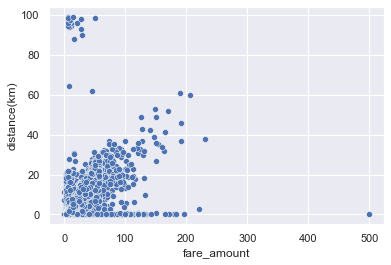

In [35]:
sns.scatterplot(data=df,x ='fare_amount',y='distance(km)')

In [36]:
df.drop((df[df['distance(km)'] > 60]).index , inplace= True)

In [37]:
df['fare_amount']

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 193854, dtype: float64

In [38]:
df.drop((df[df['fare_amount'] > 300]).index , inplace= True)

<AxesSubplot:xlabel='fare_amount', ylabel='distance(km)'>

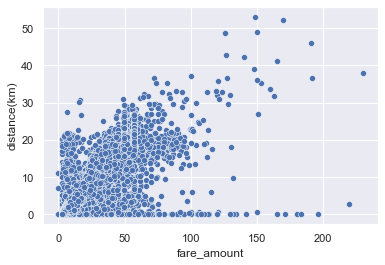

In [39]:
sns.scatterplot(data=df,x ='fare_amount',y='distance(km)')

In [40]:
df.drop((df[df['distance(km)'] < 1]).index , inplace= True)

### key

In [41]:
df.drop(columns=['key','pickup_datetime'],axis=1,inplace=True) #keys looks like pickup_datetime

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163594 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   fare_amount      163594 non-null  float64
 1   passenger_count  163594 non-null  int64  
 2   distance(km)     163594 non-null  float64
 3   Day              163594 non-null  int64  
 4   year             163594 non-null  int64  
 5   month            163594 non-null  int64  
 6   hour             163594 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 10.0 MB


In [43]:
df.describe()

,fare_amount,passenger_count,distance(km),Day,year,month,hour
count,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000,163594.000000
mean,12.393080,1.687440,3.843839,15.719592,2011.751354,6.295469,13.500996
std,9.801563,1.308031,3.711463,8.683168,1.854939,3.430768,6.590294
min,0.000000,0.000000,1.000037,1.000000,2009.000000,1.000000,0.000000
25%,6.900000,1.000000,1.662579,8.000000,2010.000000,3.000000,9.000000
50%,9.300000,1.000000,2.563281,16.000000,2012.000000,6.000000,14.000000
75%,13.700000,2.000000,4.446675,23.000000,2013.000000,9.000000,19.000000
max,230.000000,6.000000,53.066176,31.000000,2015.000000,12.000000,23.000000


In [44]:
df.head()

,fare_amount,passenger_count,distance(km),Day,year,month,hour
0,7.5,1,1.683325,7,2015,5,19
1,7.7,1,2.457593,17,2009,7,20
2,12.9,1,5.036384,24,2009,8,21
3,5.3,3,1.661686,26,2009,6,8
4,16.0,5,4.475456,28,2014,8,17


In [45]:
df.quantile([0.01,0.25,0.5,0.75,0.9,0.95,0.97,0.98,0.99,1])

,fare_amount,passenger_count,distance(km),Day,year,month,hour
0.01,4.10,1.0,1.025788,1.0,2009.0,1.0,0.0
0.25,6.90,1.0,1.662579,8.0,2010.0,3.0,9.0
0.50,9.30,1.0,2.563281,16.0,2012.0,6.0,14.0
0.75,13.70,2.0,4.446675,23.0,2013.0,9.0,19.0
0.90,22.10,4.0,7.835997,28.0,2014.0,11.0,22.0
0.95,32.10,5.0,10.761574,29.0,2015.0,12.0,23.0
0.97,41.00,5.0,14.500613,30.0,2015.0,12.0,23.0
0.98,49.57,6.0,18.638355,30.0,2015.0,12.0,23.0
0.99,56.80,6.0,20.612858,31.0,2015.0,12.0,23.0
1.00,230.00,6.0,53.066176,31.0,2015.0,12.0,23.0


In [46]:
df[df['fare_amount'] > 60]

,fare_amount,passenger_count,distance(km),Day,year,month,hour
880,93.16,2,32.779950,18,2013,6,15
966,69.25,1,19.491584,20,2015,2,10
1876,73.00,2,17.779333,24,2014,11,7
2721,62.70,1,20.299941,23,2011,4,6
3122,80.50,1,15.118045,14,2014,3,16
...,...,...,...,...,...,...,...
197570,75.00,1,28.574827,12,2012,11,11
197659,75.00,2,16.625447,7,2014,11,14
197698,74.90,1,15.343481,25,2014,11,9
198899,86.25,1,18.772437,2,2015,3,12


In [47]:
df.shape

(163594, 7)

In [48]:
df.drop(df[df['fare_amount'] > 60].index,inplace=True)

In [49]:
df[df['distance(km)'] > 23]

,fare_amount,passenger_count,distance(km),Day,year,month,hour
5603,58.50,2,24.533163,5,2015,2,13
6888,56.80,3,23.258273,6,2012,11,5
9902,49.80,1,23.849674,22,2011,5,12
11542,49.80,1,23.210772,3,2012,6,7
13471,52.00,1,25.336880,24,2013,5,13
...,...,...,...,...,...,...,...
197026,57.33,1,23.277547,3,2014,10,12
197645,49.80,1,23.142562,30,2011,11,20
199728,49.15,1,23.518735,19,2009,2,6
199882,49.57,1,23.095770,1,2010,7,5


In [50]:
df.drop(df[df['distance(km)'] > 23].index,inplace =True)

In [51]:
(df.corr()['fare_amount'])*100

fare_amount        100.000000
passenger_count      1.554349
distance(km)        90.675952
Day                 -0.193364
year                13.802032
month                2.467781
hour                -2.255233
Name: fare_amount, dtype: float64

In [52]:
df.to_csv('Clean_data.csv')

### Train, Test split

In [53]:
from sklearn.model_selection import train_test_split
x = df.drop(['fare_amount'],axis= 1 )
y = df['fare_amount']
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size= 0.15 ,random_state=40)

### Linear Regression

In [54]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
scale.fit(x_train)
scaled_x_train = scale.transform(x_train)
scaled_x_test = scale.transform(x_test)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(scaled_x_train,y_train)
lr.score(scaled_x_test,y_test)

0.8346747199330082

In [56]:
from sklearn.metrics import r2_score
y_pred = lr.predict(scaled_x_test)
r2_score(y_test,y_pred)

0.8346747199330082

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(scaled_x_train,y_train)
y_pred = ridge.predict(scaled_x_test)
r2_score(y_test,y_pred)

0.8346747314292093

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(degree = 2),Ridge())
poly.fit(scaled_x_train,y_train)
y_pred = poly.predict(scaled_x_test)
r2_score(y_test,y_pred)

0.8476324048958448

# Saving

In [59]:
import pickle 
pickle.dump(poly,open('model.pkl','wb'))

In [60]:
pickle.dump(scale,open('scale.pkl','wb'))

# Streamlit

In [61]:
%%writefile uber_app.py

import streamlit as st
import pandas as pd
import numpy as np
import pickle
import sklearn



# title

st.title('Uber Fares Prediction')

# image
st.image('Uber.png',width = 550)

# Load data
df = pd.read_csv('Clean_data.csv')
scale = pd.read_pickle('scale.pkl')
model = pd.read_pickle('model.pkl')

# input
passenger_count = st.number_input('Passenger Count',df['passenger_count'].min(),df['passenger_count'].max())
Distance = st.number_input('distance in km',df['distance(km)'].min(),df['distance(km)'].max())
Day = st.number_input('Day',df['Day'].min(),df['Day'].max())
year = st.number_input('year',df['year'].min(),df['year'].max())
month = st.number_input('month',df['month'].min(),df['month'].max())
hour = st.number_input('hour',df['hour'].min(),df['hour'].max())

new_data = {'passenger_count':passenger_count , 'distance(km)':Distance , 'Day':Day,'year':year,'month':month,'hour':hour}

new_data = pd.DataFrame(new_data ,index=[0])
#scale
new_data_scaled = scale.transform(new_data)
#model
fare_amount = model.predict(new_data_scaled)

#output
if st.button('Predict'):
    st.markdown('# Fare Amount: ')
    st.markdown(fare_amount.round(2))

Overwriting uber_app.py


In [ ]:
!streamlit run uber_app.py